In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
#Reading Data from the url
url = "http://bit.ly/w-data"
df=pd.read_csv(url)

In [7]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


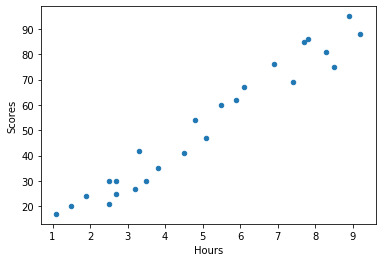

In [9]:
df.plot(x='Hours',y='Scores',kind='scatter')

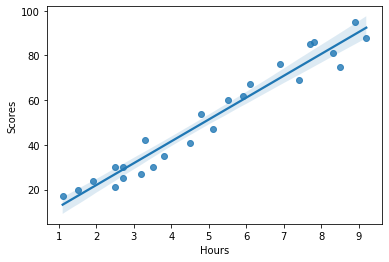

In [13]:
sns.regplot(x='Hours',y='Scores',data=df)

In [15]:
#Highly correlated
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [18]:
from sklearn.model_selection import train_test_split

In [31]:
X=df[['Hours']]
y=df['Scores']

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
lm_model=LinearRegression()

In [52]:
lm_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
pred_1=lm_model.predict(X_test)

In [54]:
pred_1

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [55]:
lm_model.score(X_test,y_test)

0.9454906892105356

In [56]:
from sklearn import metrics

In [57]:
print('MAE',metrics.mean_absolute_error(y_test,pred_1))

MAE 4.183859899002975


In [58]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred_1})  
df

,Actual,Predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


In [76]:
lm_model.predict([[9.25]])

array([93.69173249])

In [91]:
hours = [9.25]

In [94]:
df_2=pd.DataFrame({'Value':hours,'Predicted_scores': lm_model.predict([hours])})
df_2

,Value,Predicted_scores
0,9.25,93.691732
